Loan Prediction using Machine Learning


The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user's marital status, education, number of dependents, and employments.

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [388]:
#to read the dataset
df=pd.read_csv("loan_train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Analysis And Cleaning

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [390]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [391]:
# check for missing values:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [392]:
#checking duplicate values 
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

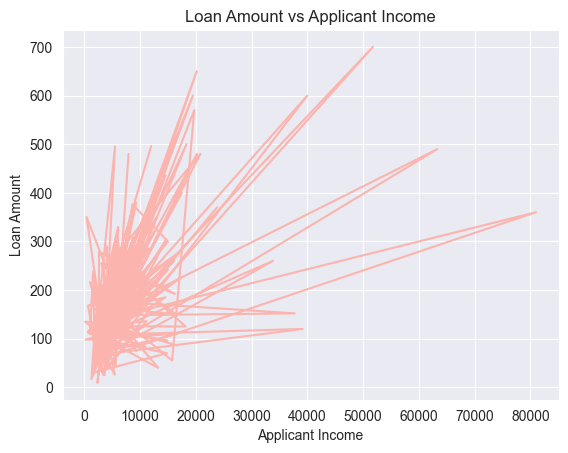

In [393]:
# Line chart for 'LoanAmount' over 'ApplicantIncome'
plt.plot(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Applicant Income')
plt.show()

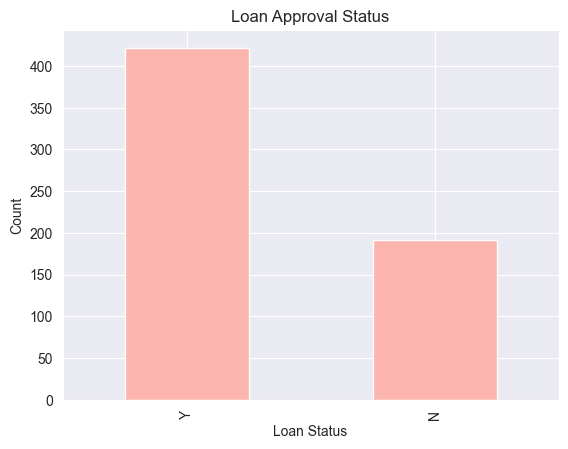

In [394]:
# Bar chart for loan approval status counts
loan_status_counts = df['Loan_Status'].value_counts()
loan_status_counts.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Approval Status')
plt.show()

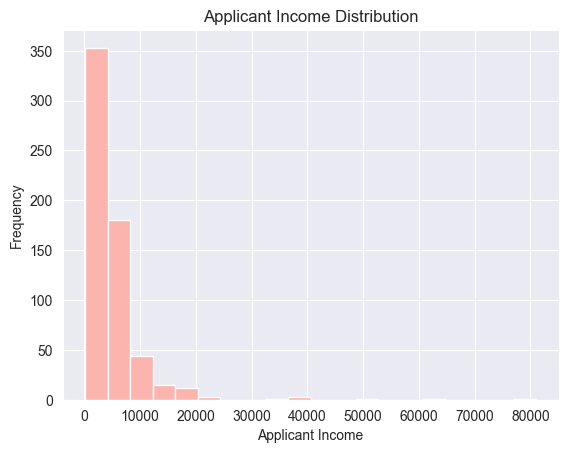

In [395]:

# Histogram for 'ApplicantIncome'
plt.hist(df['ApplicantIncome'], bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

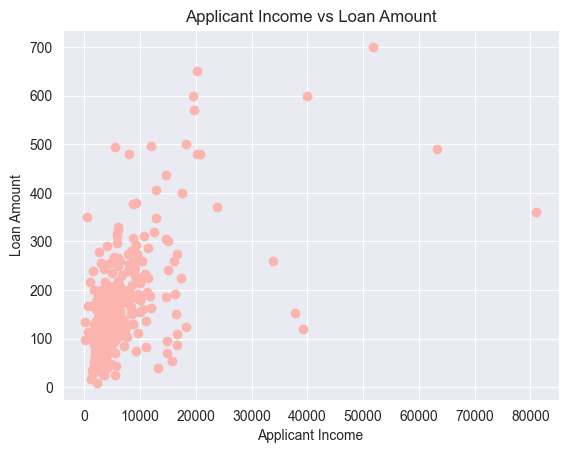

In [396]:
# Scatter plot for 'ApplicantIncome' vs 'LoanAmount'
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show()

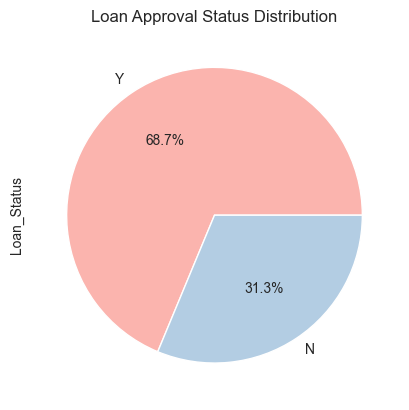

In [397]:
# Pie chart for loan approval status distribution
loan_status_counts = df['Loan_Status'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Approval Status Distribution')
plt.show()

Swarm Plot


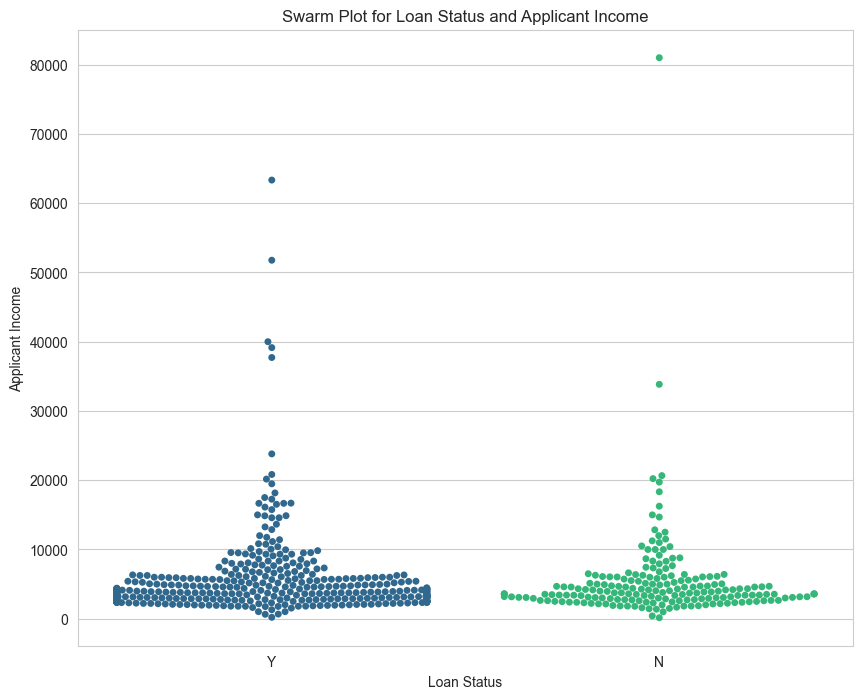

In [398]:
sns.set_style("whitegrid")

# Create a swarm plot for Loan Status and Applicant Income
plt.figure(figsize=(10, 8))
sns.swarmplot(x="Loan_Status", y="ApplicantIncome", data=df, palette='viridis')
plt.title('Swarm Plot for Loan Status and Applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


<AxesSubplot: >

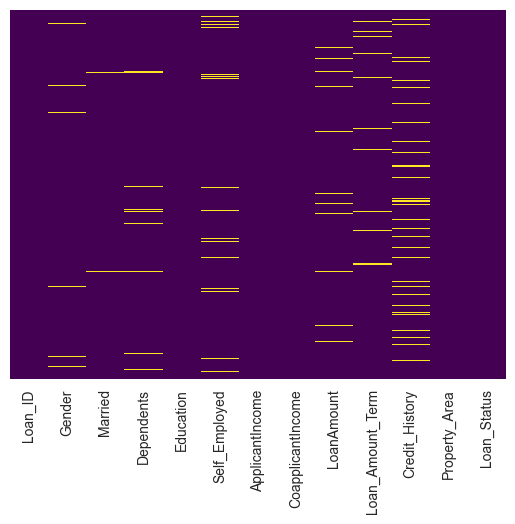

In [399]:
#Heat map showing values which are not available or null
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Data Preprocessing

In [400]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)

In [401]:
df.drop(['Gender','Loan_ID'],axis=1,inplace=True)
df = pd.concat([df,Gender],axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [402]:
married = pd.get_dummies(df['Married'],drop_first=True)
education = pd.get_dummies(df['Education'],drop_first=True)
df.drop(['Married','Education'],axis=1,inplace=True)
df = pd.concat([df,married,education],axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [403]:
df=df.rename(columns={'Yes':'Married','Male':'Gender'})
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [404]:
df=df.rename(columns={'Sf':'Self_Employed'})
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [405]:
self_emp = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df = pd.concat([df,self_emp],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate,Yes
0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0


In [406]:
df=df.rename(columns={'Yes':'Self_Employed'})
df.head(50)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate,Self_Employed
0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0
5,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,0,1
6,0,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,1,1,0
7,3+,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,Urban,Y,1,1,0,0
9,1,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,1,0,0


<AxesSubplot: >

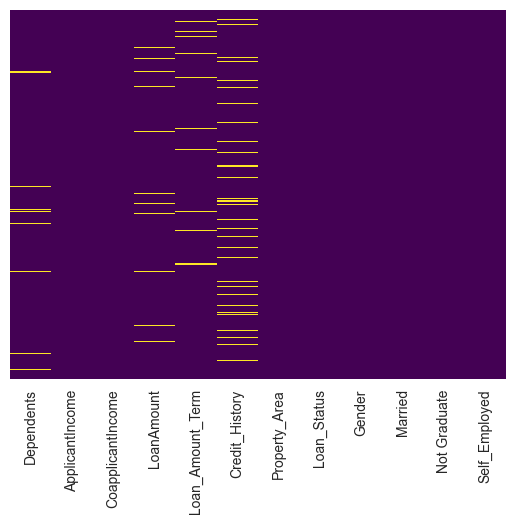

In [407]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

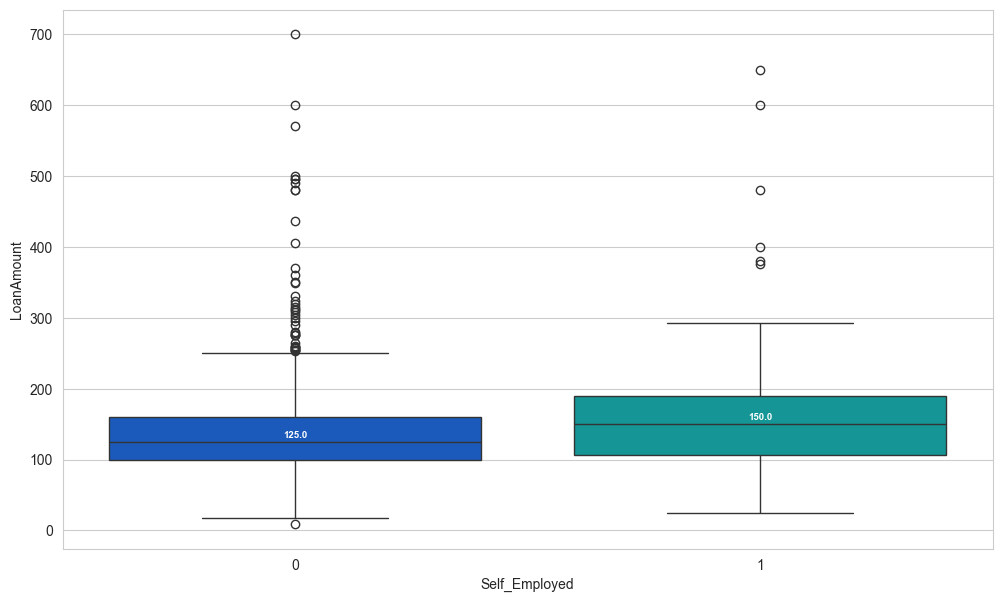

In [408]:
plt.figure(figsize=(12, 7))
bx=sns.boxplot(x='Self_Employed',y='LoanAmount',data=df,palette='winter')
medians=df.groupby(['Self_Employed'])['LoanAmount'].median()
vertical_offset=df['LoanAmount'].median() * 0.05
for xtick in bx.get_xticks():
    bx.text(xtick,medians[xtick]+vertical_offset,medians[xtick],horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [409]:
def impute_LoanAmt(cols):
    Loan = cols[0]
    selfemp = cols[1]
    
    if pd.isnull(Loan):

        if selfemp == 1:
            return 150
        else:
            return 125

    else:
        return Loan

<AxesSubplot: >

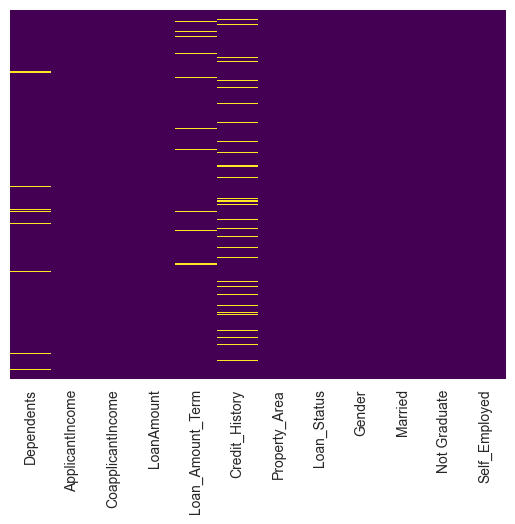

In [410]:
df['LoanAmount'] = df[['LoanAmount','Self_Employed']].apply(impute_LoanAmt,axis=1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: >

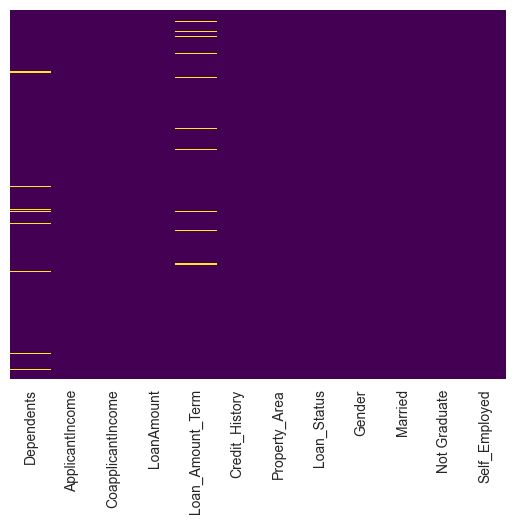

In [411]:
df['Credit_History'].fillna(1.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='count'>

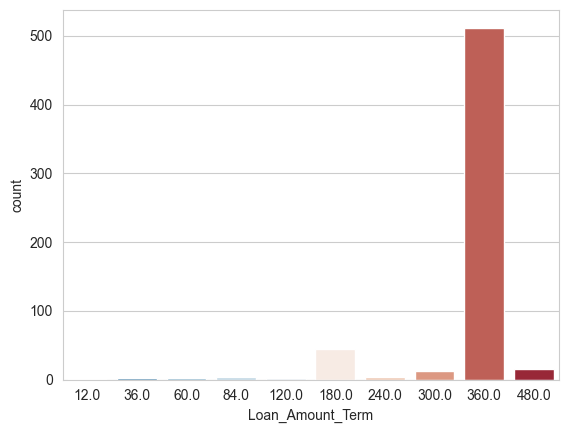

In [412]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='RdBu_r')

<AxesSubplot: >

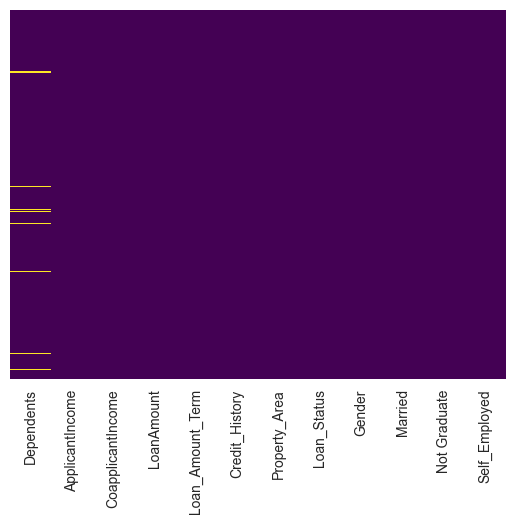

In [413]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot: xlabel='Dependents', ylabel='count'>

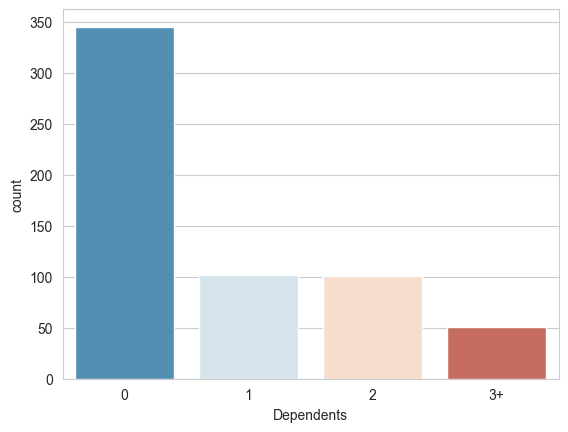

In [414]:
sns.countplot(x='Dependents',data=df,palette='RdBu_r')

<AxesSubplot: >

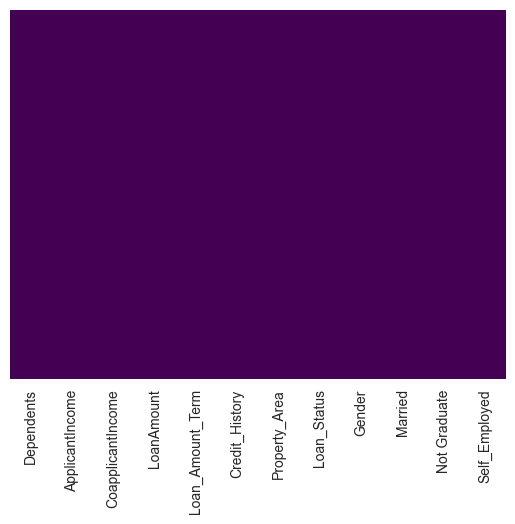

In [415]:
df['Dependents'].fillna(0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Pair Plot

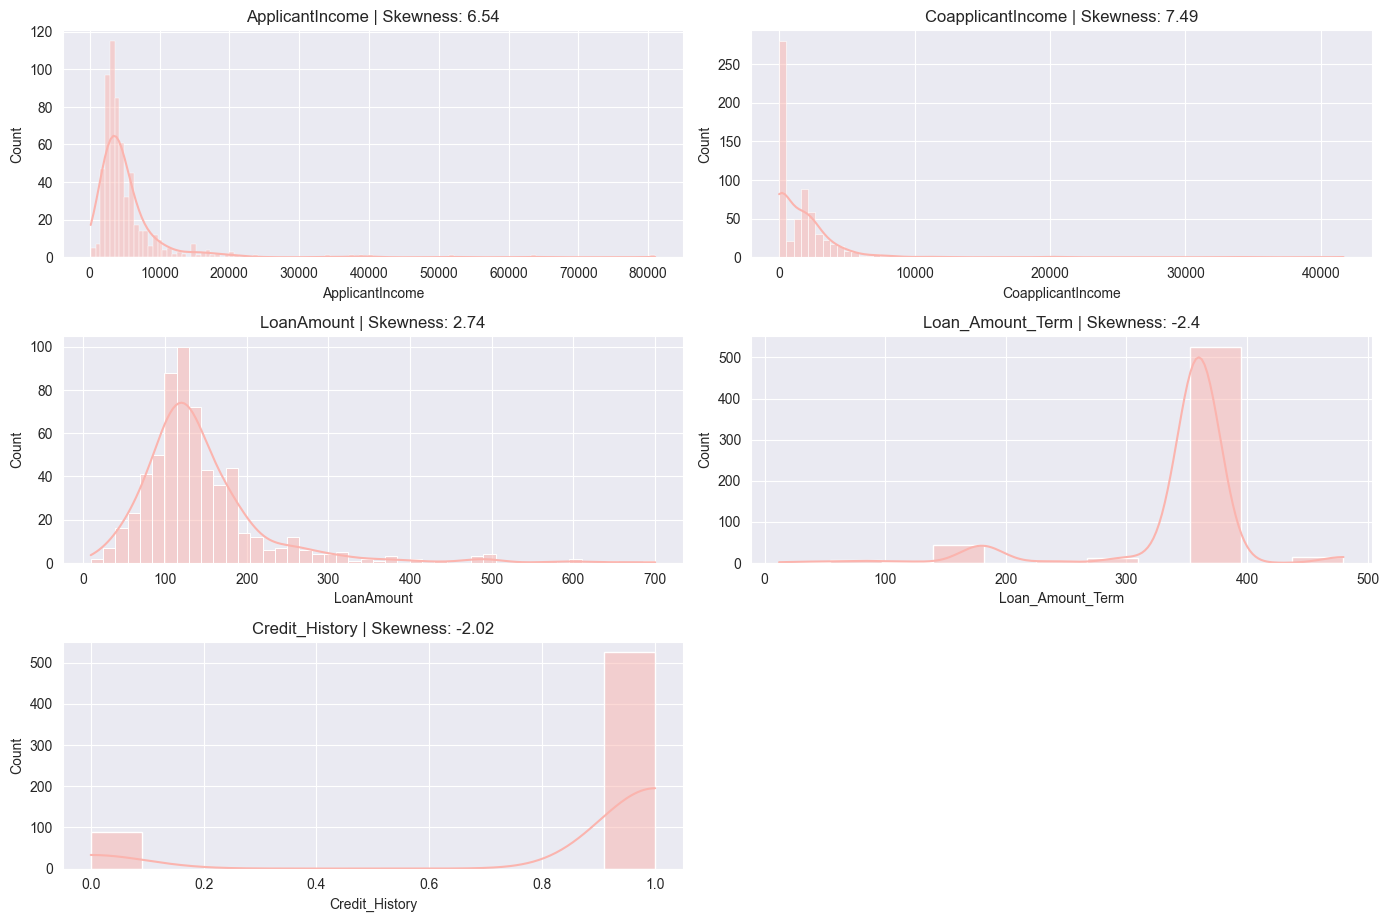

In [416]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

Correlation Matrix

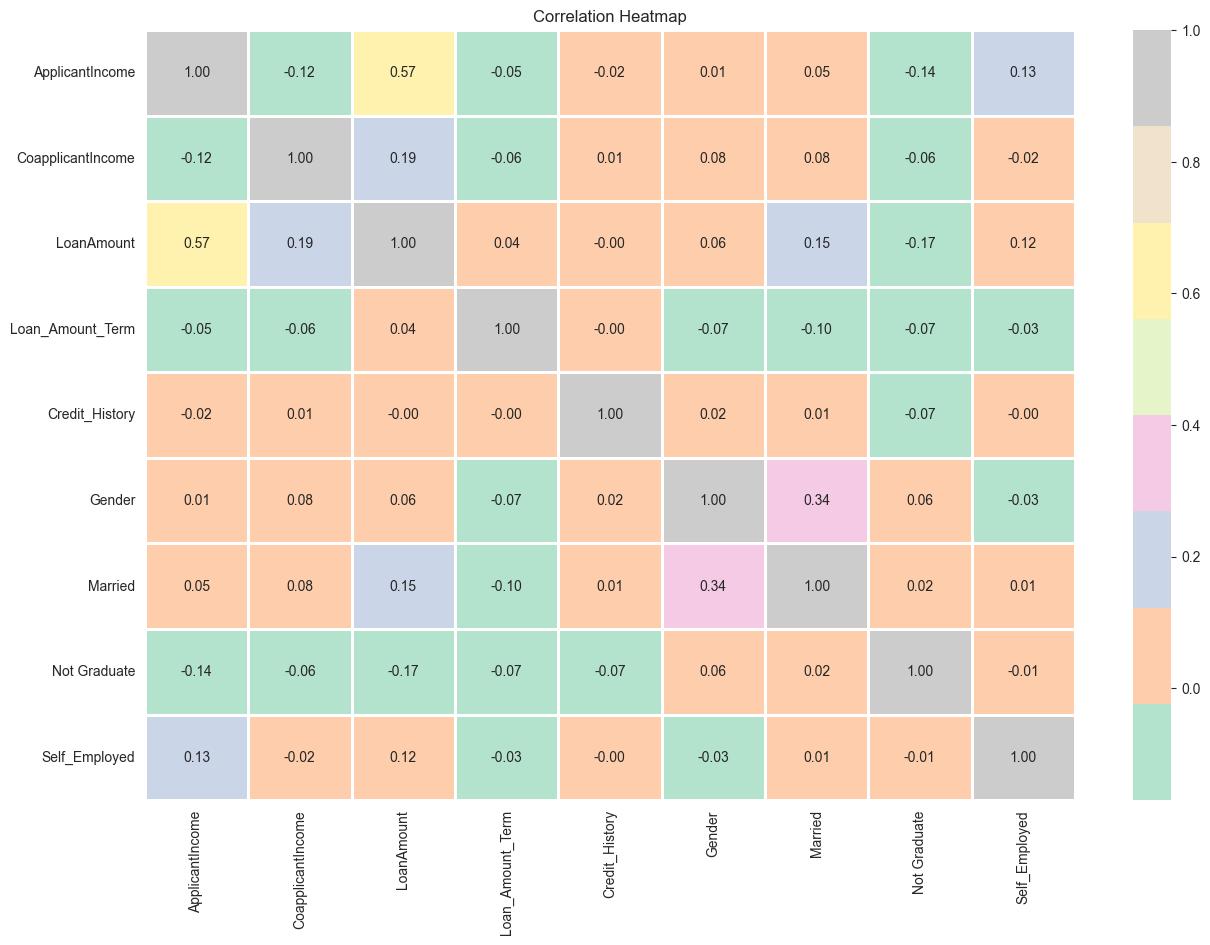

In [417]:
plt.figure(figsize=(15, 10))
 
# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()

In [418]:
loanStatus = pd.get_dummies(df['Loan_Status'],drop_first=True)
df.drop(['Loan_Status'],axis=1,inplace=True)
df = pd.concat([df,loanStatus],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Not Graduate,Self_Employed,Y
0,0,5849,0.0,125.0,360.0,1.0,Urban,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,Rural,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,1


In [419]:
PropArea = pd.get_dummies(df['Property_Area'],drop_first=True)
df.drop(['Property_Area'],axis=1,inplace=True)
df = pd.concat([df,PropArea],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Not Graduate,Self_Employed,Y,Semiurban,Urban
0,0,5849,0.0,125.0,360.0,1.0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1


In [420]:
df=df.rename(columns={'Y':'Loan_Status'})

In [421]:
df=df.replace(to_replace='3+',value=3)

In [422]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train=pd.DataFrame(df.drop('Loan_Status',axis=1))
scaler.fit(train)
scaled_features = scaler.transform(train)
df_feat = pd.DataFrame(scaled_features,columns=train.columns)
df_feat.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Not Graduate,Self_Employed,Semiurban,Urban
0,-0.737806,0.072991,-0.554487,-0.247076,0.273231,0.411733,0.505592,-1.357421,-0.528362,-0.392601,-0.782016,1.428147
1,0.253470,-0.134412,-0.038732,-0.211384,0.273231,0.411733,0.505592,0.736691,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.737806,-0.393747,-0.554487,-0.949028,0.273231,0.411733,0.505592,0.736691,-0.528362,2.547117,-0.782016,1.428147
3,-0.737806,-0.462062,0.251980,-0.306564,0.273231,0.411733,0.505592,0.736691,1.892641,-0.392601,-0.782016,1.428147
4,-0.737806,0.097728,-0.554487,-0.056717,0.273231,0.411733,0.505592,-1.357421,-0.528362,-0.392601,-0.782016,1.428147


In [423]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(scaled_features,df['Loan_Status'],
                                                    test_size=0.30)

In [424]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [425]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Not Graduate', 'Self_Employed', 'Loan_Status', 'Semiurban', 'Urban'],
      dtype='object')

In [426]:
x=df[['Married', 'Not Graduate', 'Dependents',
       'Self_Employed','ApplicantIncome','CoapplicantIncome','Semiurban','Urban','Loan_Amount_Term','Credit_History']]
y=df['LoanAmount']



In [427]:
X_train,X_test,Y_train,Y_test=train_test_split(x.values,y.values,test_size=0.3,random_state=101)

Linear Regression

In [428]:

from sklearn.linear_model import LinearRegression

In [429]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [430]:
print(lm.intercept_)

55.508996866125145


In [431]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
Married,20.641931
Not Graduate,-17.026395
Dependents,10.201953
Self_Employed,14.170060
ApplicantIncome,0.006799
CoapplicantIncome,0.006619
Semiurban,-7.765598
Urban,-11.591580
Loan_Amount_Term,0.089799
Credit_History,-1.739083


In [432]:
pred1=lm.predict(X_test)

In [433]:
from sklearn.metrics import max_error,explained_variance_score,mean_absolute_error
print(max_error(Y_test,pred1))
print(explained_variance_score(Y_test,pred1))
print(mean_absolute_error(Y_test,pred1))

413.43499346256226
0.32146750180917394
41.80180776123315


In [434]:
dfx = pd.DataFrame({

   'Original': Y_test,

   'Predicted': pred1

   })


In [435]:
lm.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([186.97891948])

BayesRigde Algortihm

In [436]:

from sklearn import linear_model


In [437]:
bm=linear_model.BayesianRidge()
bm.fit(X_train,Y_train)


BayesianRidge()

In [438]:
pred2=bm.predict(X_test)

In [439]:
coeff2=pd.DataFrame(bm.coef_,x.columns,columns=['Coefficient'])
coeff2

,Coefficient
Married,2.843843e-05
Not Graduate,-1.198853e-05
Dependents,6.220559e-05
Self_Employed,8.655873e-06
ApplicantIncome,7.298739e-03
CoapplicantIncome,6.777225e-03
Semiurban,6.237917e-07
Urban,-9.444087e-06
Loan_Amount_Term,1.483196e-03
Credit_History,-1.084215e-06


In [440]:
bm.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([143.98938586])

In [441]:
print(max_error(Y_test,pred2))
print(explained_variance_score(Y_test,pred2))
print(mean_absolute_error(Y_test,pred2))

408.1730992946226
0.3608376986165531
40.4067450010123


XGBRegressor Algorithm

In [442]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [443]:
yhat = model.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])
print('Predicted: %.3f' % yhat)

Predicted: 154.216


In [444]:
pred3=model.predict(X_test)

In [445]:
print(explained_variance_score(Y_test,pred3))
print(max_error(Y_test,pred3))

0.38255517556988683
274.5325469970703


RandomForest Algorithm

In [446]:

 from sklearn.ensemble import RandomForestRegressor
 regr = RandomForestRegressor(max_depth=2, random_state=0)
 regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [447]:
regr.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([123.46250175])

In [448]:
pred4=regr.predict(X_test)

In [449]:
print(explained_variance_score(Y_test,pred4))
print(max_error(Y_test,pred4))

0.41044459436904535
295.2034414641407


Variance Score

In [450]:
from sklearn.metrics import max_error, explained_variance_score
predictions = [pred1, pred2, pred3, pred4]
models = ['Linear Regression', 'Bayesian Ridge', 'XGBoost', 'Random Forest']
for model_name, prediction in zip(models, predictions):
    max_err = max_error(Y_test, prediction)
    var_score = explained_variance_score(Y_test, prediction)
    print(f"{model_name}:")
    print(f"  Max Error: {max_err}")
    print(f"  Explained Variance Score: {var_score}\n")


Linear Regression:
  Max Error: 413.43499346256226
  Explained Variance Score: 0.32146750180917394

Bayesian Ridge:
  Max Error: 408.1730992946226
  Explained Variance Score: 0.3608376986165531

XGBoost:
  Max Error: 274.5325469970703
  Explained Variance Score: 0.38255517556988683

Random Forest:
  Max Error: 295.2034414641407
  Explained Variance Score: 0.41044459436904535



Performance Comparison Graph

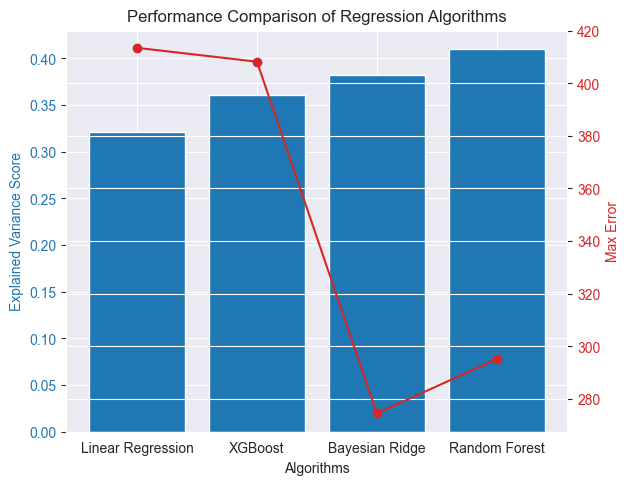

In [451]:
algorithm_names = ['Linear Regression', 'XGBoost', 'Bayesian Ridge', 'Random Forest']
variance_scores = [explained_variance_score(Y_test, pred1),
                   explained_variance_score(Y_test, pred2),
                   explained_variance_score(Y_test, pred3),
                   explained_variance_score(Y_test, pred4)]
max_error_scores = [max_error(Y_test, pred1),
                    max_error(Y_test, pred2),
                    max_error(Y_test, pred3),
                    max_error(Y_test, pred4)]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Explained Variance Score', color='tab:blue')
ax1.bar(algorithm_names, variance_scores, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Max Error', color='tab:red')
ax2.plot(algorithm_names, max_error_scores, color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')
fig.tight_layout()  
plt.title('Performance Comparison of Regression Algorithms')
plt.show()


Based on these results, the Random Forest algorithm outperformed the other algorithms with the lowest maximum error and the highest explained variance score.